<a href="https://colab.research.google.com/github/sayakpaul/MLPMixer-jax2tf/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import requests

## Image preprocessing utilities (credits: [Willi Gierke](https://ch.linkedin.com/in/willi-gierke))

In [ ]:
def preprocess_image(image):
    image = np.array(image)
    image_resized = tf.image.resize(image, (224, 224))
    image_resized = tf.cast(image_resized, tf.float32)
    image_resized = (image_resized - 127.5) / 127.5
    return tf.expand_dims(image_resized, 0).numpy()

def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = preprocess_image(image)
    return image

!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt

--2021-09-21 14:23:11--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2021-09-21 14:23:11 (95.9 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt’ saved [21675/21675]



## Load image and infer

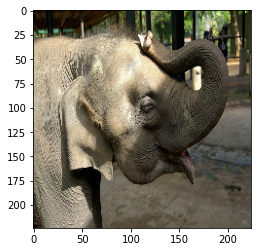

In [ ]:
with open("ilsvrc2012_wordnet_lemmas.txt", "r") as f:
    lines = f.readlines()
imagenet_int_to_str = [line.rstrip() for line in lines]

img_url = "https://p0.pikrepo.com/preview/853/907/close-up-photo-of-gray-elephant.jpg"
image = load_image_from_url(img_url)

plt.imshow((image[0] + 1) / 2)
plt.show()

In [ ]:
mobule_url = "https://tfhub.dev/sayakpaul/mixer_b16_i1k_classification/1"

classification_model = tf.keras.Sequential(
    [hub.KerasLayer(mobule_url)]
)  
predictions = classification_model.predict(image)
predicted_label = imagenet_int_to_str[int(np.argmax(predictions))]
predicted_label

'Indian_elephant, Elephas_maximus'